# 一起来打怪之 Credit Scoring 练习

-------
## >>>说明：
### 1. 答题步骤：
- 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
- 请养成代码注释的好习惯

### 2. 解题思路：
- 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
- 解题思路**仅供参考**，鼓励原创解题方法
- 为督促同学们自己思考，解题思路内容设置为**注释**，请注意查看

### 3. 所用数据：
- 问题使用了多个数据库，请注意导入每个数据库后都先**查看和了解数据的基本性质**，后面的问题不再一一提醒

--------
## 操作题

### 信用卡欺诈项目

 #### 前期数据导入,预览及处理(此部分勿修改，涉及的数据文件无需复制移动)

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [2]:
# 检查数据维度
data.shape

(112915, 11)

In [3]:
# 查看数据缺失值情况
data.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [4]:
# 清除缺失值
data.dropna(inplace=True)
data.shapey = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

c:\Users\汉堡\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
# 取出对应的X和y
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)
# 查看平均的欺诈率
y.mean()

0.06742876076872101

### 以下为操作题

#### 1.把数据切分成训练集和测试集

In [6]:
# 提示：查看train_test_split函数
from sklearn.model_selection import train_test_split
# 切分数据集
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)




(86918, 10) (21730, 10) (86918,) (21730,)


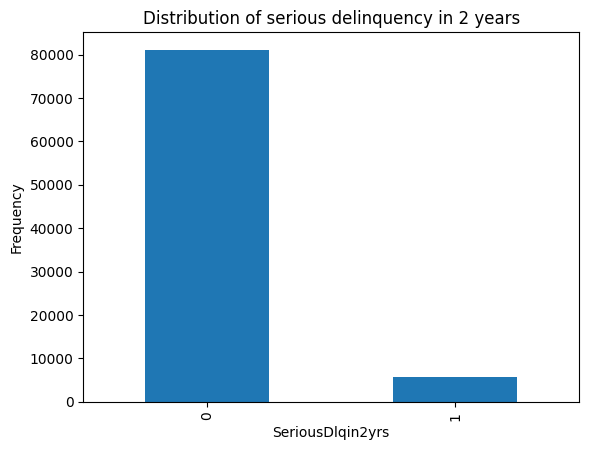

In [7]:
# 通过SeriousDlqin2yrs字段查看正负样本分布情况
y_train.value_counts()



# 绘制两种类别的柱状图
# 提示：dataframe可以直接plot(kind='bar')
import matplotlib.pyplot as plt
plt.figure()
pd.value_counts(y_train).plot(kind='bar')
plt.title('Distribution of serious delinquency in 2 years')
plt.xlabel('SeriousDlqin2yrs')
plt.ylabel('Frequency')
plt.show()



#### 2.数据预处理之离散化

In [8]:
# 请对年龄按照3岁一个区间进行离散化
# 提示：可以先计算出分桶边界，再基于pandas的cut函数进行离散化(分箱、分桶)

# 计算分桶边界
age_min = x_train['age'].min()
age_max = x_train['age'].max()
age_bins = list(range(int(age_min), int(age_max) + 3, 3))
# 基于pandas的cut函数进行离散化
x_train['bin_age'] = pd.cut(x_train['age'], bins=age_bins)
x_test['bin_age'] = pd.cut(x_test['age'], bins=age_bins)
x_train.head()



,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,bin_age
81026,0.100888,57.0,0.0,0.661067,12500.0,20.0,0.0,2.0,0.0,0.0,"(54, 57]"
22553,0.132351,41.0,0.0,0.993097,4200.0,14.0,0.0,2.0,0.0,0.0,"(39, 42]"
89803,0.963434,35.0,0.0,0.301465,6620.0,10.0,0.0,2.0,0.0,2.0,"(33, 36]"
101306,0.052429,56.0,0.0,0.089826,12000.0,4.0,0.0,1.0,0.0,0.0,"(54, 57]"
49920,0.447905,44.0,0.0,0.153896,3066.0,2.0,0.0,0.0,0.0,3.0,"(42, 45]"


#### 3.数据预处理之独热向量编码

In [9]:
# 请对上述分箱后的年龄段进行独热向量编码
# 提示：使用pandas的get_dummies完成

x_train = pd.get_dummies(x_train, columns=['bin_age'])
x_test = pd.get_dummies(x_test, columns=['bin_age'])
x_train.head()


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,"bin_age_(0, 3]","bin_age_(3, 6]","bin_age_(6, 9]","bin_age_(9, 12]","bin_age_(12, 15]","bin_age_(15, 18]","bin_age_(18, 21]","bin_age_(21, 24]","bin_age_(24, 27]","bin_age_(27, 30]","bin_age_(30, 33]","bin_age_(33, 36]","bin_age_(36, 39]","bin_age_(39, 42]","bin_age_(42, 45]","bin_age_(45, 48]","bin_age_(48, 51]","bin_age_(51, 54]","bin_age_(54, 57]","bin_age_(57, 60]","bin_age_(60, 63]","bin_age_(63, 66]","bin_age_(66, 69]","bin_age_(69, 72]","bin_age_(72, 75]","bin_age_(75, 78]","bin_age_(78, 81]","bin_age_(81, 84]","bin_age_(84, 87]","bin_age_(87, 90]","bin_age_(90, 93]","bin_age_(93, 96]","bin_age_(96, 99]","bin_age_(99, 102]","bin_age_(102, 105]"
81026,0.100888,57.0,0.0,0.661067,12500.0,20.0,0.0,2.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22553,0.132351,41.0,0.0,0.993097,4200.0,14.0,0.0,2.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
89803,0.963434,35.0,0.0,0.301465,6620.0,10.0,0.0,2.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
101306,0.052429,56.0,0.0,0.089826,12000.0,4.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49920,0.447905,44.0,0.0,0.153896,3066.0,2.0,0.0,0.0,0.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### 4.数据预处理之幅度缩放

In [10]:
# 请对连续值特征进行幅度缩放
# 提示：可以使用StandardScaler等幅度缩放器进行处理
from sklearn.preprocessing import StandardScaler
# 初始化缩放器
ss = StandardScaler()
# 对训练集的特征进行缩放
x_train = ss.fit_transform(x_train)
# 对测试集的特征进行缩放
x_test = ss.transform(x_test)
x_train[:3]





array([[-2.17978059e-02,  3.91305374e-01, -1.07341890e-01,
         1.59030066e+00,  3.61730160e-01,  2.20926377e+00,
        -6.11904926e-02,  9.05887545e-01, -5.43371430e-02,
        -7.43076590e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -3.14709116e-02, -1.11271473e-01,
        -1.56811280e-01, -1.98376710e-01, -2.20527721e-01,
        -2.26878949e-01, -2.47475101e-01, -2.65489427e-01,
        -2.76038613e-01, -2.90239139e-01, -2.90728153e-01,
        -2.80883886e-01,  3.68991007e+00, -2.62096535e-01,
        -2.69907035e-01, -2.32651012e-01, -2.08045861e-01,
        -1.77644194e-01, -1.58802430e-01, -1.43093438e-01,
        -1.25795120e-01, -9.55889347e-02, -8.24585445e-02,
        -6.47600585e-02, -4.00221191e-02, -2.06366147e-02,
        -1.17507542e-02, -5.87507290e-03, -3.39193590e-03],
       [-2.16793482e-02, -7.14754537e-01, -1.07341890e-01,
         3.08031858e+00, -1.82927862e-01,  1.03787379e+

#### 5.使用logistic regression建模，并且输出一下系数，分析重要度。   

In [11]:
# 提示：fit建模，建完模之后可以取出coef属性
from sklearn.linear_model import LogisticRegression
# 初始化模型
lr = LogisticRegression()
# 训练模型
lr.fit(x_train, y_train)
# 查看模型的系数
print(lr.coef_)

#accuracy_score
from sklearn.metrics import accuracy_score
# 预测测试集的标签
y_pred = lr.predict(x_test)
# 计算准确率
accuracy_score(y_test, y_pred)



[[-2.27781020e-02 -1.42696444e-01  1.68625825e+00  3.10056820e-01
  -1.19965334e-01 -1.22134233e-01  1.56236314e+00 -1.97521830e-01
  -3.07648316e+00  9.48004807e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -4.25627372e-02  3.96955491e-02  6.85462757e-02  6.46949594e-02
   5.81186405e-02  5.57716217e-02  3.62403724e-02  5.68402531e-02
   2.08470939e-02  5.17389838e-02  5.63645349e-02  4.52533331e-02
   4.75898123e-03 -9.44911872e-03 -2.55802353e-02 -8.89941587e-02
  -8.75398297e-02 -4.39149861e-02 -5.86791208e-02 -6.85381841e-02
  -6.66482451e-02 -3.93571646e-02 -4.51549602e-02 -2.16531594e-03
   6.76542737e-03 -1.59342081e-01 -9.12934161e-02  1.55369491e-02
  -2.49435447e-02]]


0.9319374137137598

#### 6.使用网格搜索交叉验证进行调参
调整penalty和C参数，其中penalty候选为"l1"和"l2"，C的候选为[1,10,100,500]

In [12]:
# 提示：先按照上面要求准备好网格字典，再使用GridSearchCV进行调参
from sklearn.model_selection import GridSearchCV
#参数字典
param_grid = { 'C': [0.01,0.1, 1, 10, 100]}
           
# 初始化网格搜索
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')
# 训练网格搜索
grid_search.fit(x_train, y_train)
# 查看最佳参数
print(grid_search.best_params_)
# 查看最佳模型
print(grid_search.best_estimator_)
# 查看最佳模型的准确率
print(grid_search.best_score_)






{'C': 100}
LogisticRegression(C=100)
0.9336616149535839


In [13]:
# 输出最好的超参数
# 输出最好的模型
print("best parameters:", grid_search.best_params_)
print("best model:", grid_search.best_estimator_)
print("best score:", grid_search.best_score_)
 


best parameters: {'C': 100}
best model: LogisticRegression(C=100)
best score: 0.9336616149535839


#### 7.在测试集上进行预测，计算 查准率/查全率/auc/混淆矩阵/f1值 等测试指标

In [14]:
# 提示：在测试集上预测可以使用predict
# 提示：各种指标可以在sklearn.metrics中查到各种评估指标，分别是accuracy_score、recall_score、auc、confusion_matrix、f1_score
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, f1_score
# 预测测试集的标签
y_pred = grid_search.predict(x_test)
y_pred_proba = grid_search.predict_proba(x_test)[:, 1]#预测属于某个类别的概率
# 计算各种评估指标
print('accuracy_score:', accuracy_score(y_test, y_pred))
print('recall_score:', recall_score(y_test, y_pred))
print('roc_auc_score:', roc_auc_score(y_test, y_pred_proba))
print('confusion_matrix:\n', confusion_matrix(y_test, y_pred))
print('f1_score:', f1_score(y_test, y_pred))




accuracy_score: 0.9319834330418776
recall_score: 0.03943850267379679
roc_auc_score: 0.7055902161290442
confusion_matrix:
 [[20193    41]
 [ 1437    59]]
f1_score: 0.07393483709273183


#### 8.更多优化
银行通常会有更严格的要求，因为欺诈带来的后果通常比较严重，一般我们会调整模型的标准。   

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”   
试试看把阈值设定为0.3，再看看这个时候的混淆矩阵等评估指标。

In [15]:
# 提示：thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# 根据predict_proba的结果和threshold的比较确定结果，再评估各种结果指标
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, f1_score
# 初始化阈值
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5]
#由阈值确定结果
for thres in thresholds:
    y_pred = (y_pred_proba >= thres).astype(int)
    print('threshold:', thres)
    print('accuracy_score:', accuracy_score(y_test, y_pred))
    print('recall_score:', recall_score(y_test, y_pred))
    print('roc_auc_score:', roc_auc_score(y_test, y_pred_proba))
    print('confusion_matrix:\n', confusion_matrix(y_test, y_pred))
    print('f1_score:', f1_score(y_test, y_pred))
    print('\n')


threshold: 0.1
accuracy_score: 0.8548550391164289
recall_score: 0.4177807486631016
roc_auc_score: 0.7055902161290442
confusion_matrix:
 [[17951  2283]
 [  871   625]]
f1_score: 0.28383287920072664


threshold: 0.2
accuracy_score: 0.927289461573861
recall_score: 0.1751336898395722
roc_auc_score: 0.7055902161290442
confusion_matrix:
 [[19888   346]
 [ 1234   262]]
f1_score: 0.2490494296577947


threshold: 0.3
accuracy_score: 0.9317073170731708
recall_score: 0.09692513368983957
roc_auc_score: 0.7055902161290442
confusion_matrix:
 [[20101   133]
 [ 1351   145]]
f1_score: 0.16347237880496054


threshold: 0.4
accuracy_score: 0.9319834330418776
recall_score: 0.06216577540106952
roc_auc_score: 0.7055902161290442
confusion_matrix:
 [[20159    75]
 [ 1403    93]]
f1_score: 0.11177884615384616


threshold: 0.5
accuracy_score: 0.9319834330418776
recall_score: 0.03943850267379679
roc_auc_score: 0.7055902161290442
confusion_matrix:
 [[20193    41]
 [ 1437    59]]
f1_score: 0.07393483709273183




#### 9.尝试对不同特征的重要度进行排序，通过特征选择的方式，对特征进行筛选。并重新建模，观察此时的模型准确率等评估指标。

In [21]:
# 可以根据逻辑回归的系数绝对值大小进行排序，也可以基于树模型的特征重要度进行排序
# 特征选择可以使用RFE或者selectFromModel
from sklearn.feature_selection import RFE
# 初始化RFE
rfe = RFE(lr, n_features_to_select=1)
# 训练RFE
rfe.fit(x_train, y_train)

# 查看排序结果
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), X.columns)))

#用筛选后的特征进行建模

# 取出筛选后的特征
X_selected = X[['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines', 'NumberOfDependents']]
# 切分数据集
x_train, x_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=33)
# 初始化模型
lr = LogisticRegression()
# 训练模型
lr.fit(x_train, y_train)
# 预测测试集的标签
y_pred = lr.predict(x_test)
# 计算准确率
accuracy_score(y_test, y_pred)







[(1, 'NumberOfTimes90DaysLate'), (2, 'NumberOfTime60-89DaysPastDueNotWorse'), (3, 'NumberOfTime30-59DaysPastDueNotWorse'), (4, 'age'), (5, 'DebtRatio'), (6, 'NumberRealEstateLoansOrLines'), (8, 'NumberOfOpenCreditLinesAndLoans'), (9, 'NumberOfDependents'), (10, 'MonthlyIncome'), (34, 'RevolvingUtilizationOfUnsecuredLines')]


c:\Users\汉堡\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9312471237919926

#### 10.其他模型算法尝试
使用RandomForestClassifier/SVM/KNN等sklearn分类算法进行分类，尝试上述超参数调优算法过程。

In [22]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
# 初始化模型
rf = RandomForestClassifier()
# 训练模型
rf.fit(x_train, y_train)
# 准备参数网格
param_grid = {'n_estimators': [10, 50, 100, 200, 300]}
# 初始化网格搜索
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
# 训练网格搜索
grid_search.fit(x_train, y_train)
# 查看最佳参数，最佳模型，最佳准确率
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

# 查看特征重要度
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), X.columns), reverse=True))




